In [1]:
import geopandas as gpd

# Filepath
bus_routes_fp = "../RTA_Bus_Routes-shp/RTA_Bus_Routes.shp"
bus_stops_fp = "../RTA_Bus_Stops-shp/RTA_Bus_Stops.shp"

# Read the data
bus_routes_df = gpd.read_file(bus_routes_fp)
bus_stops_df = gpd.read_file(bus_stops_fp)

In [2]:
bus_routes_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1202 non-null   int64   
 1   shape_id    1202 non-null   object  
 2   agency_id   673 non-null    object  
 3   route_id    1202 non-null   object  
 4   route_shor  1100 non-null   object  
 5   route_long  1202 non-null   object  
 6   route_desc  299 non-null    object  
 7   route_type  1202 non-null   object  
 8   route_url   513 non-null    object  
 9   route_colo  609 non-null    object  
 10  route_text  603 non-null    object  
 11  route_sort  549 non-null    object  
 12  min_headwa  263 non-null    object  
 13  eligibilit  549 non-null    object  
 14  continuous  549 non-null    object  
 15  continuo_1  549 non-null    object  
 16  route_ty_1  1202 non-null   object  
 17  Agency      1202 non-null   object  
 18  ShapeSTLen  1202 non-null   float64 
 19

In [3]:
routes = bus_routes_df[['OBJECTID','geometry','route_id']]
routes

,OBJECTID,geometry,route_id
0,1,"LINESTRING (-7905400.282 5173762.247, -7905403...",2933
1,2,"LINESTRING (-7905427.444 5173767.197, -7905430...",2934
2,3,"LINESTRING (-7905402.313 5173769.844, -7905400...",2935
3,4,"LINESTRING (-7905400.273 5173765.107, -7905401...",2935
4,5,"LINESTRING (-7905400.273 5173765.107, -7905401...",2940
...,...,...,...
1197,1198,"LINESTRING (-7865747.917 5253340.492, -7865795...",2845
1198,1199,"LINESTRING (-7871919.164 5247832.369, -7871781...",2845
1199,1200,"LINESTRING (-7865747.917 5253340.492, -7865795...",2847
1200,1201,"LINESTRING (-7893574.589 5244817.837, -7893562...",3241


In [4]:
stops = bus_stops_df[['OBJECTID','geometry','stop_id']]
stops

,OBJECTID,geometry,stop_id
0,1,POINT (-7909492.270 5175061.965),2537977
1,2,POINT (-7907825.375 5174323.435),2558590
2,3,POINT (-7907841.345 5174327.000),2558591
3,4,POINT (-7907841.639 5174594.527),2558592
4,5,POINT (-7907873.991 5174751.647),2558593
...,...,...,...
8981,8982,POINT (-7959589.474 5183502.633),9833f5b5-c43d-426b-a30e-47eb67028541
8982,8983,POINT (-7958162.550 5183153.670),fe2c5c3a-fcd2-4680-abe7-bb8df71f6679
8983,8984,POINT (-7961200.746 5182393.493),95b0813c-9c53-42bd-9317-8219d6e4e2e7
8984,8985,POINT (-7938489.270 5206827.598),f8c065d2-6308-4b92-8eef-2383dd3b96ec


In [5]:
routes.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
stops.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8986 entries, 0 to 8985
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  8986 non-null   int64   
 1   geometry  8986 non-null   geometry
 2   stop_id   8986 non-null   object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 210.7+ KB


<AxesSubplot:>

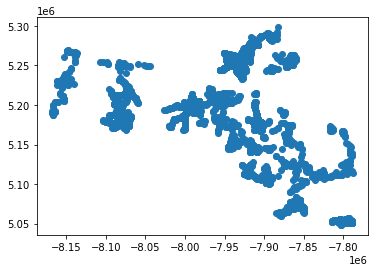

In [8]:
stops.plot()

In [9]:
test_route = routes.loc[routes['route_id'].astype(str) == '2982']
test_stop = stops.loc[stops['stop_id'].astype(str) == '800616']

line = test_route['geometry'].iloc[0]
stop = test_stop['geometry'].iloc[0]

print(stop)

POINT (-7813096.497494482 5168615.764336213)


In [10]:
line.distance(stop) < 100

True

In [11]:
mapped_routes = [-1] * stops.size

In [12]:
for index, row in routes.iterrows():
    line = row['geometry']
    for index2, row2 in stops.iterrows():
        stop = row2['geometry']

        if line.distance(stop) < 100:
            mapped_routes[index2] = row['route_id']

In [13]:
mapped_routes_df = gpd.GeoSeries(mapped_routes)

<ipython-input-13-7c8286a6daae>:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  mapped_routes_df = gpd.GeoSeries(mapped_routes)


In [14]:
stops['route_id'] = mapped_routes[0:8986]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [15]:
stops

,OBJECTID,geometry,stop_id,route_id
0,1,POINT (-7909492.270 5175061.965),2537977,2937
1,2,POINT (-7907825.375 5174323.435),2558590,2936
2,3,POINT (-7907841.345 5174327.000),2558591,2936
3,4,POINT (-7907841.639 5174594.527),2558592,2946
4,5,POINT (-7907873.991 5174751.647),2558593,2946
...,...,...,...,...
8981,8982,POINT (-7959589.474 5183502.633),9833f5b5-c43d-426b-a30e-47eb67028541,1b2be85e-a5c2-4bc7-a310-1eb635c356e9
8982,8983,POINT (-7958162.550 5183153.670),fe2c5c3a-fcd2-4680-abe7-bb8df71f6679,1b2be85e-a5c2-4bc7-a310-1eb635c356e9
8983,8984,POINT (-7961200.746 5182393.493),95b0813c-9c53-42bd-9317-8219d6e4e2e7,1b2be85e-a5c2-4bc7-a310-1eb635c356e9
8984,8985,POINT (-7938489.270 5206827.598),f8c065d2-6308-4b92-8eef-2383dd3b96ec,e2065400-eaa5-4f9d-9f3e-1354a20642ec


In [16]:
stops.to_csv('../data/bus_stop_route_mapping.csv')